In [1]:
# Basic imports to start with the problem
import os
import datetime
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.style as style

In [2]:
# Loading the data 
uber_data = pd.read_csv('Uber Request Data.csv',encoding = 'UTF-8')

**Doing basic check on the dataset

In [3]:
# Checking the number of rows and columns
uber_data.shape

(6745, 6)

In [4]:
# Describing the column for mean,std and quantiles information
uber_data.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [5]:
# Checking the datatype
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [6]:
# Inspecting the first and last few rows
uber_data.head()
uber_data.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


In [7]:
# Checking for the nulls column wise
uber_data.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [8]:
# Checking for the nulls row wise
uber_data.isnull().sum(axis =1).head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

From above we can conclude the records are nulls as Status column having No Cars Available values which is required for our analysis and we are retaining all the columns

In [9]:
# Converting the inconsistent dates to a single format
uber_data['Request timestamp'] = pd.to_datetime(uber_data['Request timestamp'])
uber_data['Drop timestamp'] = pd.to_datetime(uber_data['Drop timestamp'])

Values for the date fields are inconsistent having different format above lines are used to bring all the values for dates to a single format

In [10]:
# Verifying the data for the changes done
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [11]:
# Creating derived columns for hour and minutes

#uber_data['request_day'] = uber_data['Request timestamp'].dt.day
#uber_data['request_month'] = uber_data['Request timestamp'].dt.month
#uber_data['request_year'] = uber_data['Request timestamp'].dt.year

#uber_data['drop_day'] = uber_data['Drop timestamp'].dt.day
#uber_data['drop_month'] = uber_data['Drop timestamp'].dt.month
#uber_data['drop_year'] = uber_data['Drop timestamp'].dt.year

uber_data['request_hour']=uber_data['Request timestamp'].dt.hour
uber_data['request_min']=uber_data['Request timestamp'].dt.minute

uber_data['drop_hour']=uber_data['Drop timestamp'].dt.hour
uber_data['drop_min']=uber_data['Drop timestamp'].dt.minute

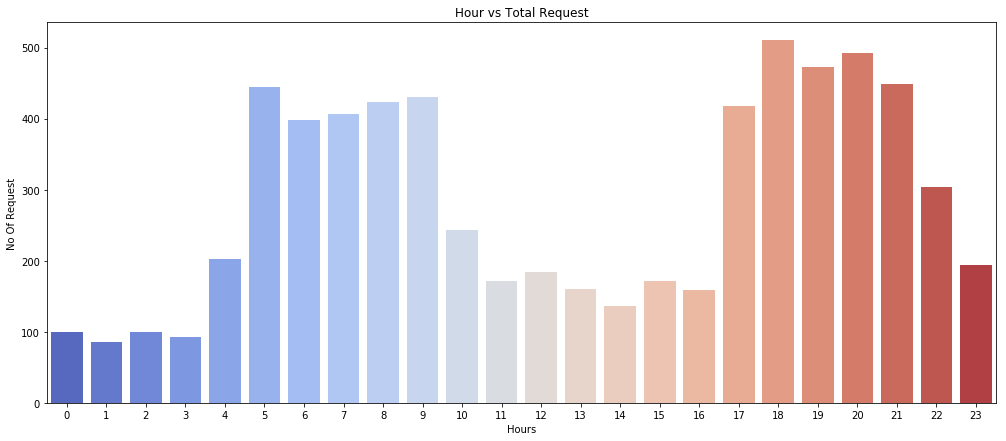

In [12]:
# Checking the number of requesr during day
plt.figure(figsize = (17,7))
x_val = uber_data.groupby('request_hour').request_hour.count().index
y_val = uber_data.groupby('request_hour').request_hour.count().values
plot  = sns.barplot(x = x_val , y=y_val , palette = 'coolwarm')
plt.xlabel('Hours')
plt.ylabel('No Of Request')
plt.title('Hour vs Total Request')
plt.show()


From the Above graph we can conclude that the most number of request made between (5-9 AM) and (17-21 PM)

In [13]:
# Now we will try to find out the frequency separately for Airplort and City

uber_data_airport = uber_data[uber_data['Pickup point']=='Airport']
uber_data_city = uber_data[uber_data['Pickup point']=='City']

x_val_airport = uber_data_airport.groupby(['request_hour']).request_hour.sum().index
y_val_airport = uber_data_airport.groupby(['request_hour']).request_hour.count().values

x_val_city = uber_data_city.groupby(['request_hour']).request_hour.sum().index
y_val_city = uber_data_city.groupby(['request_hour']).request_hour.sum().values




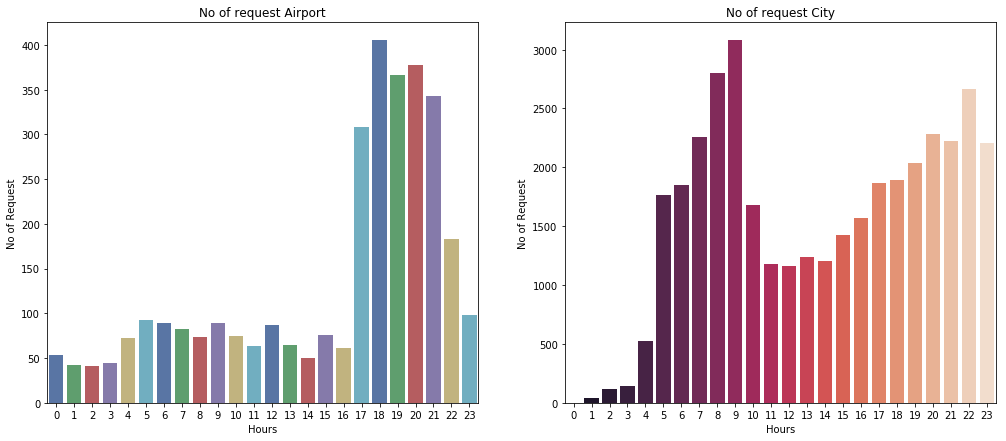

In [14]:
# Plotting the comparison for Airport vs City number of request
plt.figure(figsize = (17,7))
plt.subplot(1,2,1)
sns.barplot(x = x_val_airport,y = y_val_airport,palette = 'deep')
plt.xlabel('Hours')
plt.ylabel('No of Request')
plt.title('No of request Airport')

plt.subplot(1,2,2)
sns.barplot(x = x_val_city,y = y_val_city,palette = 'rocket')
plt.xlabel('Hours')
plt.ylabel('No of Request')
plt.title('No of request City')

plt.show()

From above graph we can conclude that the rush hour for airport taxi is (17-21) and for city the rush hour is (5-10)

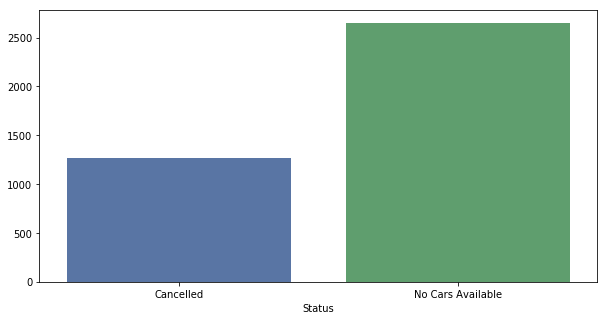

In [15]:
# Graph showing total number of 'Cancelled' and 'No Cars Available'
plt.figure(figsize = (10,5))
sns.barplot(x = uber_data[(uber_data.Status == 'No Cars Available') | (uber_data.Status== 'Cancelled')].
            groupby('Status').
            Status.count().index,
           y = uber_data[(uber_data.Status == 'No Cars Available') | (uber_data.Status== 'Cancelled')].
            groupby('Status').
            Status.count().values,palette = 'deep')

Above graph is showing the number of cancelled and no cars available for the entire dataset

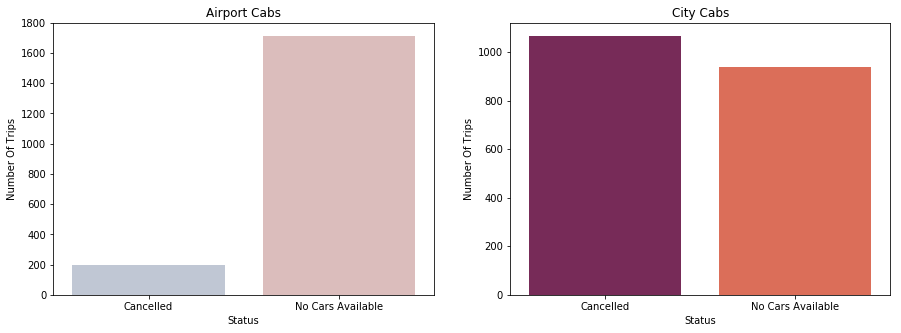

In [16]:
# Graph showing total number of 'Cancelled' and 'No Cars Available' Airport and City wise
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.ylabel('Number Of Trips')
plt.title('Airport Cabs')
sns.barplot(x = uber_data_airport[(uber_data_airport.Status=='No Cars Available')|(uber_data_airport.Status == 'Cancelled')].groupby(
    'Status').Status.count().index,
            y = uber_data_airport[(uber_data_airport.Status=='No Cars Available')|(uber_data_airport.Status == 'Cancelled')].groupby(
    'Status').Status.count().values,palette = 'vlag')
plt.subplot(122)
plt.ylabel('Number Of Trips')
plt.title('City Cabs')
sns.barplot(x = uber_data_city[(uber_data_city.Status=='No Cars Available')|(uber_data_city.Status == 'Cancelled')].groupby(
    'Status').Status.count().index,
            y = uber_data_city[(uber_data_city.Status=='No Cars Available')|(uber_data_city.Status == 'Cancelled')].groupby(
    'Status').Status.count().values,palette = 'rocket')
plt.show()

DataSet is saggrigated and we can now see the unavailability of cabs for airport and city in two separate graphs

<Figure size 1224x360 with 0 Axes>

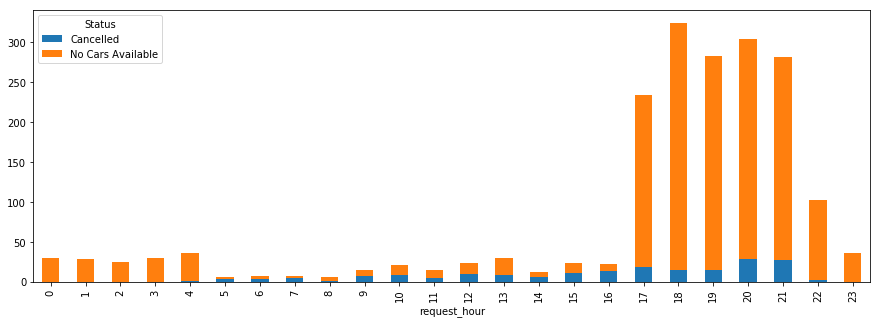

In [17]:
# Graph showing total number of 'Cancelled' and 'No Cars Available' for Airport by hours
plt.figure(figsize=(17,5))
uber_data_airport[(uber_data_airport.Status=='No Cars Available')|(uber_data_airport.Status == 'Cancelled')].groupby(
    ['Status','request_hour']).Status.count().unstack('Status').fillna(0).plot(kind='bar', stacked=True,
                                                                              linestyle='dashed',linewidth=2,
                                                                              figsize=(15,5))

**We can conclude from the above graph majority of cabs are unavailable from airport pickup from 17-21 Hours

<Figure size 1224x360 with 0 Axes>

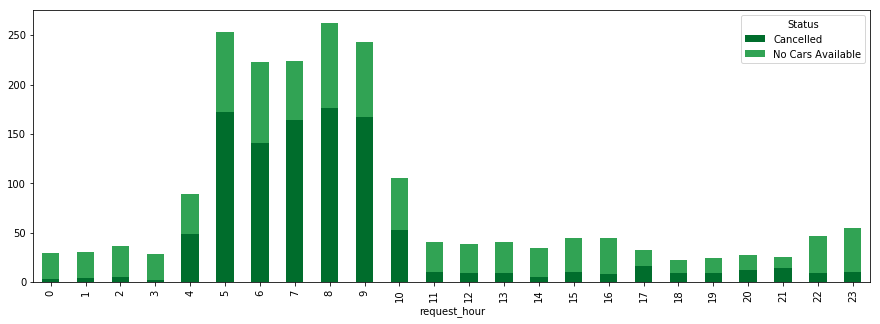

In [18]:
# Graph showing total number of 'Cancelled' and 'No Cars Available' for City by hours
plt.figure(figsize=(17,5))
colors = ["#006D2C", "#31A354","#74C476"]
uber_data_city[(uber_data_city.Status=='No Cars Available')|(uber_data_city.Status == 'Cancelled')].groupby(
    ['Status','request_hour']).Status.count().unstack('Status').fillna(0).plot(kind='bar', stacked=True,
                                                                                linestyle='dashed',linewidth=2,
                                                                              color=colors,figsize=(15,5))
plt.show()

**We can conclude from the above graph majority of cabs are cancelled  from city pickup from 5-10 Hours

In [19]:
# Sagrigating the airport and city DataFrames for peak hours where demand is more
# For airport the peak hours between 17 & 21
# For City the peak hour between 5 & 10
airport_peak_hours = uber_data_airport[(uber_data_airport.request_hour >=17) & (uber_data_airport.request_hour <=21)]
city_peak_hours = uber_data_city[(uber_data_city.request_hour >=5) & (uber_data_city.request_hour <=10)]


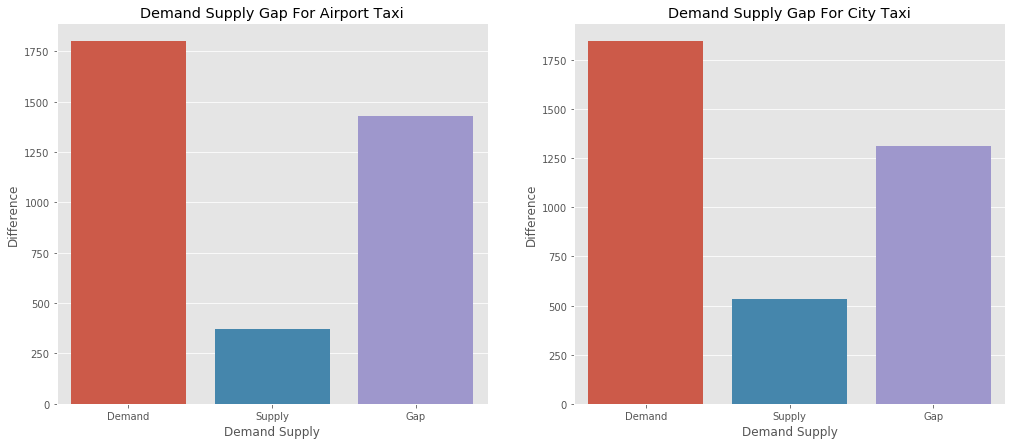

In [20]:
# Calculating Supply Demand Gap from Airport trip where we already know the peak time is 17 - 21 PM 
# Calculating Supply Demand Gap from City trip where we already know the peak time is 5 - 10 PM 

airport_demand_supply_gap = {'Demand Supply':['Demand', 'Supply', 'Gap'], 'Difference':[len(airport_peak_hours.index)
                                           , len(airport_peak_hours[airport_peak_hours.Status == 'Trip Completed'].index)
                                           , len(airport_peak_hours.index)- len(airport_peak_hours[airport_peak_hours.Status == 'Trip Completed'].index)]}

airport_gap = pd.DataFrame(airport_demand_supply_gap)



city_demand_supply_gap = {'Demand Supply':['Demand', 'Supply', 'Gap'], 'Difference':[len(city_peak_hours.index)
                                           , len(city_peak_hours[city_peak_hours.Status == 'Trip Completed'].index)
                                           , len(city_peak_hours.index)- len(city_peak_hours[city_peak_hours.Status == 'Trip Completed'].index)]}

city_gap = pd.DataFrame(city_demand_supply_gap)

style.use('ggplot')
plt.figure(figsize  = (17,7))
plt.subplot(1,2,1)
plt.title('Demand Supply Gap For Airport Taxi')
sns.barplot(x = 'Demand Supply',y ='Difference',data =airport_gap )
plt.subplot(1,2,2)
plt.title('Demand Supply Gap For City Taxi')
sns.barplot(x = 'Demand Supply',y ='Difference',data =city_gap )
plt.show()

Above Graph is showing the supply demand gap for airport and city cabs